# Simple Particle Swarm Optimization Algorithm

## Step-by-step implementation
##### T V Bhaskarachary (丁陽)
##### Computer Science and Information Engineering * Tamkang University Taiwan

In [1]:
import numpy as np

In [2]:
# initiate random number generator
seed = 0
rng = np.random.default_rng(seed)

# algorithm constants
iterations = 120
inertia = 0.7 # inertia weight
inertia_max = 0.9
inertia_min = 0.4
c1 = 2.0 # cognition constant
c1_max = 2.5
c1_min = 1
c2 = 2.0 # social constant
c2_max = 2.5
c2_min = 1
swarm_size = 49

# fitness evaluation
def get_fitness(x, y):
    return -np.square(x - 10) - np.square(y - 20)

# pbest is the best position of a particle
# swarm tensor third dimension construct:
# 0: x
# 1: y
# 2: vx
# 3: vy
# 4: pbest
# 5: pbestx
# 6: pbesty
swarm = np.zeros((iterations+1, swarm_size, 7))

# gbest is the best position of the swarm
# gbest second dimension construct:
# 0: gbestval
# 1: gbestx
# 2: gbesty
gbest = np.zeros((iterations+1, 3))

# initialize particles with random position vectors
# zero iteration => initialization
# initial velocity is zero
swarm[0,:,:2] = rng.uniform(low=-100, high=100, size=(swarm_size, 2))

# initialize pbest values and positions
swarm[0,:,4] = get_fitness(swarm[0,:,0], swarm[0,:,1])
swarm[0,:,5:7] = swarm[0,:,:2]

# initialize gbest values and position
pid = swarm[0,:,4].argmax()
gbest[0] = swarm[0,pid,4:7]

In [3]:
for i in range(1, swarm.shape[0]):
    
    # update inertia
    inertia = inertia_max - (inertia_max - inertia_min)*i/iterations
    
    # update learning factors
    c1 = c1_max - (c1_max - c1_min)*i/iterations
    c2 = c2_max - (c2_max - c2_min)*i/iterations
    
    # update velocity
    swarm[i,:,2:4] = inertia * swarm[i-1,:,2:4] +\
        c1 * 0.1*rng.uniform(low=0, high=1, size=(swarm_size, 2)) * (swarm[i-1,:,5:7] - swarm[i-1,:,:2]) +\
        c2 * 0.1*rng.uniform(low=0, high=1, size=(swarm_size, 2)) * (gbest[i-1,1:3] - swarm[i-1,:,:2])
    
    # update current position
    swarm[i,:,:2] = swarm[i-1,:,:2] + swarm[i,:,2:4]
    
    # evaluate the fitness
    fitness = get_fitness(swarm[i,:,0], swarm[i,:,1])
    
    # update particle best value and position
    swarm[i,:,4] = np.where(fitness > swarm[i-1,:,4], fitness, swarm[i-1,:,4])
    swarm[i,:,5] = np.where(fitness > swarm[i-1,:,4], swarm[i,:,0], swarm[i-1,:,5])
    swarm[i,:,6] = np.where(fitness > swarm[i-1,:,4], swarm[i,:,1], swarm[i-1,:,6])
    
    # update the swarm best position
    pid = swarm[i,:,4].argmax()
    gbest[i] = swarm[i,pid,4:7]

In [4]:
gid = gbest[:,0].argmax()
print(gbest[gid,0]) # the best fitness value

-1.8228855498877719e-16


In [5]:
print(gbest[gid,1:3]) # gbest (x,y) coordinates

[ 9.99999999 20.        ]


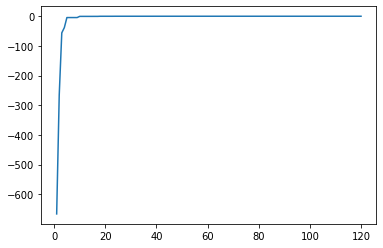

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,gbest.shape[0]),gbest[1:,0])

In [7]:
from matplotlib.animation import FuncAnimation
# !pip install PyQt5
%matplotlib qt

fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
scatter = ax.scatter(swarm[0,:,0], swarm[0,:,1])

def animate(i):
    data = np.vstack((swarm[i+1,:,0], swarm[i+1,:,1])).T
    scatter.set_offsets(data)
    return scatter,
    
animation = FuncAnimation(fig, animate, frames=iterations, interval=100, blit=False, repeat=False)
# animation.save('animation.mp4')
plt.show()